**Import**

In [1]:
from reachy_sdk import ReachySDK
from reachy_sdk.trajectory import goto
import time
import numpy as np
import threading
from matplotlib import pyplot as plt

reachy = ReachySDK(host='localhost')

**Thread saving joints positions**

In [9]:
def rec():
    
    recorded_joints = [
        reachy.r_arm.r_shoulder_pitch,
        reachy.r_arm.r_shoulder_roll,
        reachy.r_arm.r_arm_yaw,
        reachy.r_arm.r_elbow_pitch,
        reachy.r_arm.r_forearm_yaw,
        reachy.r_arm.r_wrist_pitch,
        reachy.r_arm.r_wrist_roll,
    ]

    trajectories = []
    sampling_frequency = 100 
    start = time.time()
    while (time.time() - start) < 15:
        current_point = [joint.present_position for joint in recorded_joints]
        trajectories.append(current_point)

        time.sleep(1 / sampling_frequency)
    plt.figure()
    plt.plot(np.array(trajectories)[:,0])
    plt.savefig('r_shoulder_pitch.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,1])
    plt.savefig('r_shoulder_roll.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,2])
    plt.savefig('r_arm_yaw.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,3])
    plt.savefig('r_elbow_pitch.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,4])
    plt.savefig('r_forearm_yaw.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,5])
    plt.savefig('r_wrist_pitch.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,6])
    plt.savefig('r_wrist_roll.png')

In [34]:
reachy.turn_on('r_arm')

**Playing a recorded trajectory and saving joints positions**

In [27]:
#loading joint trajectory
with open('list.npy', 'rb') as f:
    joint_poses = np.load(f)
    print(joint_poses)
    
t = threading.Thread(target=rec)
t.start()


for i in range(len(joint_poses)):
    dic ={
                reachy.r_arm.r_shoulder_pitch: joint_poses[i][0],
                reachy.r_arm.r_shoulder_roll: joint_poses[i][1],
            reachy.r_arm.r_arm_yaw: joint_poses[i][2],
            reachy.r_arm.r_elbow_pitch: joint_poses[i][3],
            reachy.r_arm.r_forearm_yaw: joint_poses[i][4],
            reachy.r_arm.r_wrist_pitch: joint_poses[i][5],
            reachy.r_arm.r_wrist_roll: joint_poses[i][6]}
    print(prec-joint_poses[i][0])
    print(prec1-joint_poses[i][1])
    
    goto(goal_positions=dic, duration=0.75)
    time.sleep(1)

[[ -1.16742571  -2.17929221  19.71257152 -83.0012648   -2.45901814
   -6.62166986  25.38611282]
 [-10.76684096   2.64628223  23.17298099 -75.34115445  -1.82470642
   -3.71609084  26.60834466]
 [-15.93703039   5.92592033  24.5584374  -69.07773416  -1.36604223
   -3.98973754  26.52271521]
 [-19.4913946    7.72159729  25.04024068 -66.66400446  -1.51618402
   -2.47125274  26.85006469]
 [-20.52466432  10.35178327  23.72611064 -62.99611729   0.74643464
   -4.12670153  19.57028378]
 [-21.2844544   12.74070057  22.53136723 -61.21866548   2.91592898
   -4.2728204   12.05661385]
 [-23.21807351   9.67017633  22.32347227 -62.49643325  -0.38799873
   -2.41904183  21.04219575]
 [-20.96527959  12.56684141  21.78474664 -56.55110897   3.24835845
   -9.2953297   10.82060004]
 [-22.75814396   8.21193907  22.58809765 -53.21242726  -1.58420341
  -12.70768154  26.71546751]]
44.75814395631748
-11.181939068751914


**Go back to front moving r_shoulder_pitch joint only**

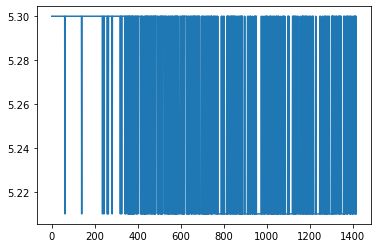

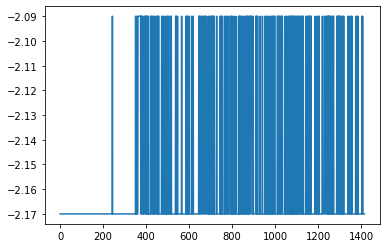

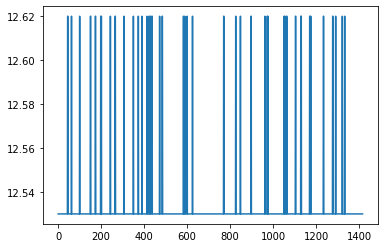

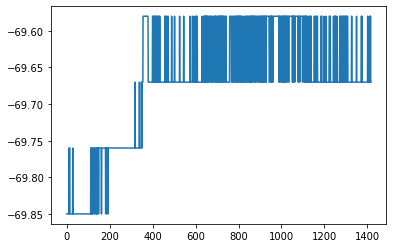

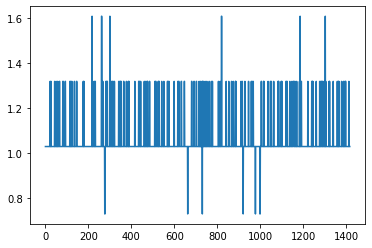

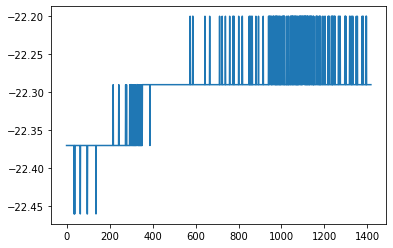

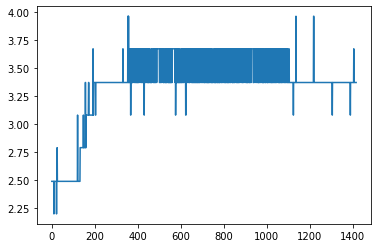

In [35]:
#Starting position
dic ={
    reachy.r_arm.r_shoulder_pitch: 0,
    reachy.r_arm.r_shoulder_roll: -2.44,
    reachy.r_arm.r_arm_yaw: 12.62,
    reachy.r_arm.r_elbow_pitch: -87.08,
    reachy.r_arm.r_forearm_yaw: -2.79,
    reachy.r_arm.r_wrist_pitch: 1.36,
    reachy.r_arm.r_wrist_roll: 2.20}

t = threading.Thread(target=rec)
t.start()

for i in range(7):
    dic[reachy.r_arm.r_shoulder_pitch] += ((-1)**i)*5*i

    goto(goal_positions=dic, duration=0.75)
    time.sleep(1)

In [37]:
reachy.turn_off_smoothly('r_arm')